In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def check_error(e):
    if e > 0.99:
        return 0.3
    elif e > 0.95:
        return 0.1
    elif e > 0.9:
        return 0.05
    elif e < 0.1:
        return 0.02
    elif e < 0.05:
        return 0.01
    elif e < 0.02:
        return 0.002
    elif e < 0.01:
        return 0.0001
    else:
        return 0.01


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
df = pd.read_csv("linear_regression_dataset.csv", names = ["x1", "x2", "y"])
data = df[['x1', 'x2','y']].values

epsilon = 1e-15

<Axes: >

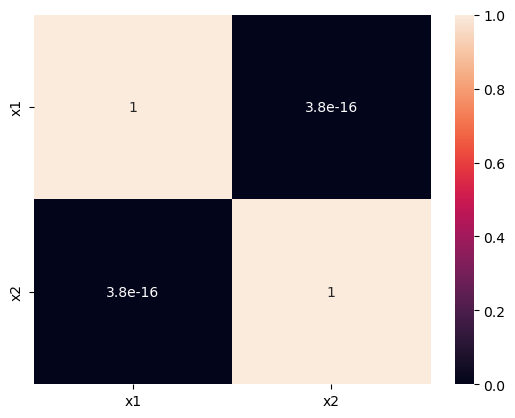

In [5]:
sns.heatmap(df[['x1','x2']].corr(), annot=True)

- No Collinearity in features (x1 and x2 are independently manipulating result)
- m1 = sum(xi1 - X1)(yi - y)/sum(xi1 - X1) ** 2
- m2 = sum(xi2 - X2)(yi - y)/sum(xi2 - X2) ** 2

In [6]:
x1 = data[:,0]
x2 = data[:,1]
y = data[:,2]

In [7]:
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
y_mean = np.mean(y)

In [8]:
w1 = round(sum((x1 - x1_mean) * (y - y_mean)) / sum((x1 - x1_mean) ** 2),5)
w2 = round(sum((x2 - x2_mean) * (y - y_mean)) / sum((x2 - x2_mean) ** 2),5)
b = round(y_mean - (w1 * x1_mean + w2 * x2_mean),5)

In [9]:
w1,w2,b

(0.3, 0.2, 0.4)

In [10]:
total_loss, loss = 0.0, 0.0
lowest_error = float('inf') 
best_w1, best_w2 = None, None

In [11]:
for i in range(5):
    if i == 0:
        pass
    else:
        w1 = random.uniform(best_w1-0.00001*best_w1,best_w1+0.00001*best_w1)
        w2 = random.uniform(best_w2-0.00001*best_w2,best_w2+0.00001*best_w2)

    loss_list = []
    for epoch in range(1):
        initial_lr = 0.01
        decay = 0.01
        learning_rate = initial_lr / (1 + decay * epoch)
        total_loss = 0.0
        for x1,x2,result in data:
            A = x1*w1 + x2*w2 + b
            overall_error = (result - A)
            #A = sigmoid(A)
            learning_rate = check_error(overall_error)
            error = abs(overall_error)
            if error < lowest_error:
                lowest_error = error
                best_w1, best_w2 = w1, w2
            
            if A != result:
                A = np.clip(A,epsilon,1-epsilon)
                loss = overall_error ** 2
                prev_total_loss = total_loss
                total_loss += loss
            else:
                loss = 0.0
                total_loss += loss

            dW1 = x1*overall_error
            dW2 = x2*overall_error
            dB = overall_error
            w1 += learning_rate * dW1
            w2 += learning_rate * dW2
            b += learning_rate * dB
        
        loss_list.append(round(total_loss,4))
        print(f"Epoch {epoch} completed. Loss = {loss_list}")
        print(f"w1 = {best_w1},w2 = {best_w2}")
    print("\n"+"-"*50+"\n")

Epoch 0 completed. Loss = [0.0]
w1 = 0.3,w2 = 0.2

--------------------------------------------------

Epoch 0 completed. Loss = [0.0]
w1 = 0.3,w2 = 0.2

--------------------------------------------------

Epoch 0 completed. Loss = [0.0]
w1 = 0.3,w2 = 0.2

--------------------------------------------------

Epoch 0 completed. Loss = [0.0]
w1 = 0.3,w2 = 0.2

--------------------------------------------------

Epoch 0 completed. Loss = [0.0]
w1 = 0.3,w2 = 0.2

--------------------------------------------------



In [12]:
dW1,dW2,dB

(8.076101640774879e-08, 1.0383559252424846e-07, 1.1537288058249828e-07)

In [13]:
best_w1,best_w2,b

(0.3, 0.2, 0.399999893959283)

In [14]:
df = pd.read_csv("test_model.csv")
data = df[['x1', 'x2', 'y']].values

In [15]:
total_diff = 0.0

In [16]:
diff = []
for x1,x2,y in data:
    A = x1*best_w1 + x2*best_w2 + b
    diff.append(y / A *100)
    print(f"Actual = {y}, Predicted = {A}")
total_diff = np.mean(np.abs(diff))
print(total_diff)

Actual = 0.64, Predicted = 0.639999893959283
Actual = 0.66, Predicted = 0.659999893959283
Actual = 0.68, Predicted = 0.6799998939592831
Actual = 0.7, Predicted = 0.699999893959283
Actual = 0.72, Predicted = 0.719999893959283
Actual = 0.74, Predicted = 0.7399998939592829
Actual = 0.76, Predicted = 0.7599998939592829
Actual = 0.78, Predicted = 0.7799998939592829
Actual = 0.8, Predicted = 0.799999893959283
Actual = 0.82, Predicted = 0.819999893959283
Actual = 0.67, Predicted = 0.669999893959283
Actual = 0.69, Predicted = 0.6899998939592831
Actual = 0.71, Predicted = 0.7099998939592831
Actual = 0.73, Predicted = 0.729999893959283
Actual = 0.75, Predicted = 0.749999893959283
Actual = 0.77, Predicted = 0.7699998939592829
Actual = 0.79, Predicted = 0.7899998939592829
Actual = 0.81, Predicted = 0.809999893959283
Actual = 0.83, Predicted = 0.829999893959283
Actual = 0.85, Predicted = 0.849999893959283
100.00001432517293
